# 비즈니스 Case Study를 통한 추천 시스템 구현

## 1강 추천 시스템 Basic, 데이터 탐색과 비개인화 추천

### 1. 추천 시스템 기초

#### 추천화 시스템이란?

특정 유저에게 적합한 아이템을, 특정 아이템에 적합한 유저를 추천하는 시스템입니다.

#### 추천 시스템의 필요성

과거엔 유저가 접할 수 있는 상품, 콘텐츠가 제한적였습니다. 그래서 고객이 직접 찾는데에도 큰 문제가 없었고 전체적으로 콘텐츠 소비가 되었습니다.

하지만 웹/모바일 환경이 나타나면서 다양한 상품, 콘텐츠가 등장하게 되면서 소수의 유명한 아이템`Few Popular Items`만 소비량이 증가하고 그외 것은 소외되는 긴 꼬리 현상`Long Tail Phenomemno`이 일어나게 됩니다. 추천 시스템은 이런 문제를 해결하는데 도움이 됩니다.

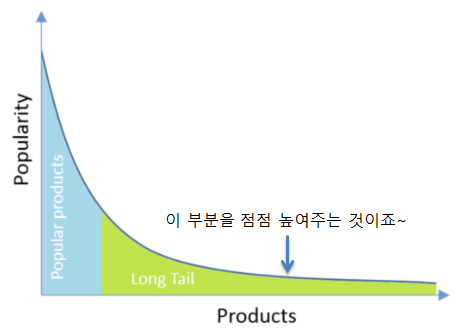

또한 콘텐츠가 많아지면서 정보를 찾는데 시간이 오래 걸리기도 합니다. 유저가 원하는 콘텐츠가 있지만, 어떤 키워드로 찾아야 하는지 모르는 경우가 있죠. 이러한 경우 추천 시스템을 통해 원하는 것을 명명할 수 없어도 찾아낼 수 있습니다.

#### Long-tail 추천 케이스

**1. 유튜브 동영상 추천**<br>
+ 동영상 조회수 급상승! -> 해당 영상과 관련 있거나, 해당 영상이 업로드된 채널의 영상을 추천<br>


**2. SNS 친구 추천**<br>
+ 수천만 혹은 수십억명의 유저들 가운데 내가 알만한 사람들 추천

#### 사용하는 정보

1. **유저 정보**
    1. **유저 프로파일링** : 추천 대상 유저에 관련된 정보를 구축, 개별 유저 또는 유저 그룹별로 추천
    2. **식별자(ID)** : 유저 ID, 디바이스 ID 브라우저 쿠키
    3. **데모그래픽** : 성별, 연령, 지역, 관심사
    4. **유저 행동 정보** : 페이지 방문 기록, 아이템 평가, 구매 등의 피드백 기록
2. **아이템 정보**
    1. **추천 아이템의 종류**
        1. **포탈** : 뉴스, 블로그, 웹툰 등 콘텐츠 추천
        2. **광고/커머스** : 광고 소재, 상품 추천
        3. **미디어** : 영화, 음악, 동영상 추천
    2. **아이템 프로파일링**
        1. **아이템 ID**
        2. **아이템의 고유 정보**
            + `영화` : 장르, 출연 배우 및 감독, 소개글, 개봉년도
            + `상품` : 상품 카테고리, 브랜드, 출시일, 상품 이미지
            + `음악` : 아티스트, 작곡가, 장르, 음악 신호 그 자체(!)
3. **유저 - 아이템 간 상호작용 정보**
    1. **유저와 아이템의 상호작용 데이터**
        + 유저가 오프라인/오프라인에서 아이템과 상호작용 시 로그로 기록
        + 추천 시스템 학습하는 데이터의 `Feedback`이 됨
    2. **Explicit Feedback**
        + 유저에게 아이템에 대한 만족도를 직접 물어봄<br>
            _**feat.** 1~5 사이 평점_
    3. **Implicit Feedback**
        + 유저가 아이템을 클릭하거나 구매한 경우<br>
            _**feat.** 쿠팡에서 유저 상품 구매 시 `Implicit Feedback` = 실제 결과`Y`_


#### 결국 추천 시스템이 하는 것은?

특정 유저에게 적합한 아이템을, 그리고 특정 아이템에게 적합한 유저를 추천합니다. 그리고 이를 위해서 유저-아이템에 대한 `Score` 값이 필요합니다. 

#### 추천 알고리즘 종류

1. Simple Aggregate (Popular, Average score, Recend Uploads)
    + 아이템 별로 인기도를 확인하는 방식으로 가장 간단
2. 연관성 분석(Association Analysis)
    + Transactions의 집단에서 특정 항목의 발생을 예상할 수 있는 Rule을 찾는 것_(잘 안쓰입니다)_
3. **콘텐츠 기반 추천(Content-based Recommendation)**<font color ='red'>(Usually!)</font>
    + 유저가 선호하는 아이템을 기반으로 해당 아이템과 유사한 아이템을 추천
    + 딥러닝`Deep Learning`이 나오면서 아이템이 가진 정보(이미지, etc)를 활용하기 용이해지면서 활용성이 증가
4. **협업 필터링(Collaborative-filtering)**<font color ='red'>(Usually!)</font>
    + 유저와 비슷한 성향을 갖는 유저들이 선호하는 아이템을 추천
    + 아이템 `Feature`를 사용하지 않음에도 높은 성능을 보임
5. <font color ='deepskyblue'>**Deep Learning Based Recommendation**</font>
    + 콘텐츠 기반 추천 + 협업 필터링

MAE, RMSE: 
AUC: 0~1 이진 분류 Cost Function

#### 추천 시스템 문제점

+ **Cold Start** 
    + 새로운 유저나 아이템 등장 시 학습을 위한 데이터 부족
    + 협업 필터링 모델 구축 어려움
+ **Scalability**
    + 유저와 아이템이 크게 증가하면 데이터의 크기가 기하급수로 커짐, 학습이나 추천을 위한 추론에 걸리는 시간과 계산량 多
    + **전반적인 머신러닝 시스템의 이슈**
+ **Data Sparsity**
    + 유저-아이템 사이의 Feedback이 있는 경우 < 없는 경우
    + **이는 유저, 아이템 개수가 많아질 수록 두드러짐**

#### 추천 시스템 서빙 예시

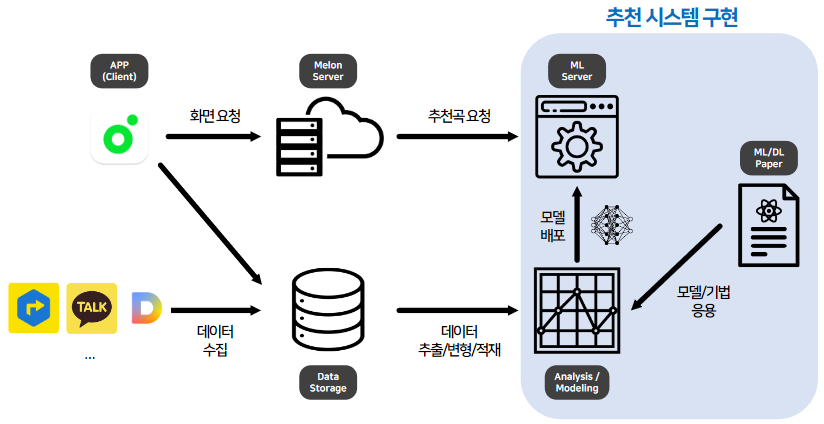

### 2. 인기도 기반 추천

말 그대로 가장 `인기`있는 아이템을 추천

#### Score 만드는 법

> **인기도의 척도**
>> 조회수, 평균 평점, 리뷰 개수, 좋아요 / 싫어요 수, etc<br>
>>  **ex.** 네이버 쇼핑 랭킹순, 다음 뉴스, 댓글 추천, Reddit Hot

1. 조회수가 가장 많은 아이템을 추천**`Most Popular`**
2. 평균 평점이 가장 높은 아이템을 추천 **`Highly Rated`**

하나만의 방식으로 만드는 것은 원하는 결과를 얻기 힘듭니다. 

뉴스를 예로 들면 조회수가 많은 기사가 있지만, 오래전에 게시된 글이라 조회수가 누적되어 많은 경우가 있습니다. 뉴스는 `최신성`이라는 속성이 매우 중요하기 때문에 이를 고려해야 합니다.

##### Score 방식

**Fomula Overview**

$Score = (좋아요 - 싫어요) - 경과 시간$
$= (페이지 뷰) - 경과 시간$

+ 이경우 페이지 뷰가 더 빠르게 늘어나면, **1~2년이 지나도 계속해서 같은 글이 Top Rank에 보이게 될 것입니다.**

**Hacker News Formula**

$Score = \frac{페이지 뷰 - 1}{(age + 2)^{gravity}}$


+ 뉴스에 대한 랭킹 Score, 시간 단위가 초`sec` 또는 분`Min` 단위
+ 시간이 지날수록 `age`가 점점 증가하면서 `Score`가 작아집니다
+ 시간에 따라 줄어드는 `Score`를 조정하기 위해 `gravity`라는 상수를 사용합니다

**Reddit Formula**

$Score = log_{10}(좋아요 - 싫어요) + \frac{ sin(좋아요 - 싫어요) sec}{45000}$

+ 첫번째 term은 `Popularity`, 두번째 Term은 `글이 포스팅이 게시된 절대 시간`으로 **나중에 게시된 포스팅일 수록 더 높은 `Score`를 가지게 됩니다.**
+ 첫번째 `vote`에 대해서 가장 높은 가치를 부여하며, **`vote`가 늘어날 수록 `Score`의 증가 폭이 작아집니다.**

**Highly Rated**

$평균 평점 = \frac{긍정적인 리뷰 수}{전체 리뷰}$ 

$평점 = 평균 평점 - (평균 평점 - 0.5(중간 수) * 2^{-log_{10}{전체 리뷰}})$ 

+ 가장 높은 평점을 통한 Score
+ `rating`은 평균값을 사용하되, 전체 review 개수에 따라 rating을 보정

**Steam Rating Formula**

$평균 평점 = \frac{모든 평점의 합}{전체 리뷰}$ 

$평점 = 평균 평점 - (평균 평점 - 3.0 * 2^{-log_{10}{전체 리뷰}})$ 

+ Steam의 경우 1.0 ~ 5.0까지 Rating

### 3. 연관분석 알고리즘

#### Association Rule Mining

일반적으로 Conf, Lift를 자주 사용함

leverage, conviction: 자주 쓰이진 않으나 API 참고해서 보도록 하자

### 4. 추천 시스템의 평가 지표

NDCG 또는 Hit Rate 자주 사용 in 논문, A/B Test

'2.5.0'